In [1]:
from __future__ import print_function
import numpy as np
np.random.seed(1337)  # for reproducibility
 # Only use this line to show in jupyter
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
from keras.preprocessing import sequence
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import LSTM, SimpleRNN, GRU
from keras.datasets import imdb

Using Theano backend.


In [3]:
max_features = 20000
maxlen = 80  # cut texts after this number of words (among top max_features most common words)
batch_size = 32

In [4]:
print('Loading data...')
(X_train, y_train), (X_test, y_test) = imdb.load_data(nb_words=max_features,
                                                      test_split=0.2)

Loading data...


In [5]:
print(len(X_train), 'train sequences')
print(len(X_test), 'test sequences')

print(X_train[0])
print(X_test[0])

20000 train sequences
5000 test sequences
[1, 20, 28, 716, 48, 495, 79, 27, 493, 8, 5067, 7, 50, 5, 4682, 13075, 10, 5, 852, 157, 11, 5, 1716, 3351, 10, 5, 500, 7308, 6, 33, 256, 41, 13610, 7, 17, 23, 48, 1537, 3504, 26, 269, 929, 18, 2, 7, 2, 4284, 8, 105, 5, 2, 182, 314, 38, 98, 103, 7, 36, 2184, 246, 360, 7, 19, 396, 17, 26, 269, 929, 18, 1769, 493, 6, 116, 7, 105, 5, 575, 182, 27, 5, 1002, 1085, 130, 62, 17, 24, 89, 17, 13, 381, 1421, 8, 5167, 7, 5, 2723, 38, 325, 7, 17, 23, 93, 9, 156, 252, 19, 235, 20, 28, 5, 104, 76, 7, 17, 169, 35, 14764, 17, 23, 1460, 7, 36, 2184, 934, 56, 2134, 6, 17, 891, 214, 11, 5, 1552, 6, 92, 6, 33, 256, 82, 7]
[1, 19, 115, 9, 237, 61, 10, 167, 99, 119, 3001, 6, 8, 5, 1041, 1302, 219, 119, 2306, 11, 41, 42, 10, 5, 137, 7137, 26, 152, 119, 33, 66, 186, 7, 25, 159, 6, 19, 165, 266, 33, 66, 841, 72, 1388, 68, 19, 235, 11914, 10, 9344, 7, 5, 132, 24, 2, 5878, 6, 25, 3608, 11, 5, 8387, 12819, 2394, 1041, 639, 59, 18, 1163, 26, 197, 7, 53, 38, 9, 189, 3180, 11

In [6]:
print('Pad sequences (samples x time)')
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

Pad sequences (samples x time)
X_train shape: (20000, 80)
X_test shape: (5000, 80)


In [7]:
print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 256, input_length=maxlen, dropout=0.2))
# http://keras.io/layers/recurrent/#lstm
model.add(LSTM(256, dropout_W=0.2, dropout_U=0.2))  # try using a GRU instead, for fun
# dropout_W: float between 0 and 1. Fraction of the input units to drop for input gates.
# dropout_U: float between 0 and 1. Fraction of the input units to drop for recurrent connections.
model.add(Dense(1))
model.add(Activation('sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Build model...


In [8]:
# Lets explore the model
# http://keras.io/models/about-keras-models/
print(model.summary()) #  summary representation of your model

____________________________________________________________________________________________________
Layer (type)                       Output Shape        Param #     Connected to                     
embedding_1 (Embedding)            (None, 80, 256)     5120000     embedding_input_1[0][0]          
____________________________________________________________________________________________________
lstm_1 (LSTM)                      (None, 256)         525312      embedding_1[0][0]                
____________________________________________________________________________________________________
dense_1 (Dense)                    (None, 1)           257         lstm_1[0][0]                     
____________________________________________________________________________________________________
activation_1 (Activation)          (None, 1)           0           dense_1[0][0]                    
Total params: 5645569
_____________________________________________________________________

In [9]:
print('Train...')
print(X_train.shape)
print(y_train.shape)
result = model.fit(X_train, y_train, batch_size=batch_size, nb_epoch=15,
          validation_data=(X_test, y_test))

Train...
(20000, 80)
(20000,)
Train on 20000 samples, validate on 5000 samples
Epoch 1/15
20000/20000 [==============================] - 247s - loss: 0.6021 - acc: 0.6532 - val_loss: 0.5464 - val_acc: 0.7232
Epoch 2/15
20000/20000 [==============================] - 258s - loss: 0.4622 - acc: 0.7862 - val_loss: 0.4149 - val_acc: 0.8108
Epoch 3/15
20000/20000 [==============================] - 263s - loss: 0.3386 - acc: 0.8565 - val_loss: 0.3919 - val_acc: 0.8120
Epoch 4/15
20000/20000 [==============================] - 264s - loss: 0.2702 - acc: 0.8884 - val_loss: 0.4226 - val_acc: 0.8284
Epoch 5/15
20000/20000 [==============================] - 274s - loss: 0.2120 - acc: 0.9144 - val_loss: 0.4432 - val_acc: 0.8228
Epoch 6/15
20000/20000 [==============================] - 268s - loss: 0.1663 - acc: 0.9334 - val_loss: 0.4372 - val_acc: 0.8242
Epoch 7/15
20000/20000 [==============================] - 269s - loss: 0.1358 - acc: 0.9491 - val_loss: 0.5026 - val_acc: 0.8230
Epoch 8/15
20000/2

In [10]:
score, acc = model.evaluate(X_test, y_test,batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

5000/5000 [==============================] - 14s    
Test score: 0.74500096693
Test accuracy: 0.8104


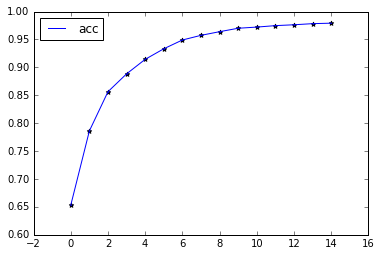

In [11]:
# plot the result
plt.figure
plt.plot(result.epoch,result.history['acc'],label="acc")
# plt.plot(result.epoch,result.history['val_acc'],label="val_acc")
plt.scatter(result.epoch,result.history['acc'],marker='*')
# plt.scatter(result.epoch,result.history['val_acc'])
plt.legend(loc='upper left')
plt.show()

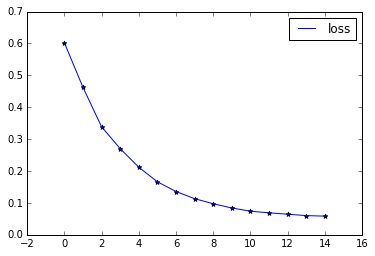

In [12]:
plt.figure
plt.plot(result.epoch,result.history['loss'],label="loss")
# plt.plot(result.epoch,result.history['val_loss'],label="val_loss")
plt.scatter(result.epoch,result.history['loss'],marker='*')
# plt.scatter(result.epoch,result.history['val_loss'],marker='*')
plt.legend(loc='upper right')
plt.show()